In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from plotly import graph_objects as go

# Simple Decay-Effect Model

$A_t = T_t + \lambda A_{t-1}$,  
$A_t$ - Adstock at time t - market feature (number of sales, for example),  
$T_t$ - value of advertising variable (views, for example)  
$\lambda$ - advertising lag

#### Modeling advertising variable

Example for number of views for advertising

In [98]:
T = np.array([100, 200, 300, 400, 500, 1000, 2000, 4000, 3000, 2000, 1000, 500, 300, 200, 100])

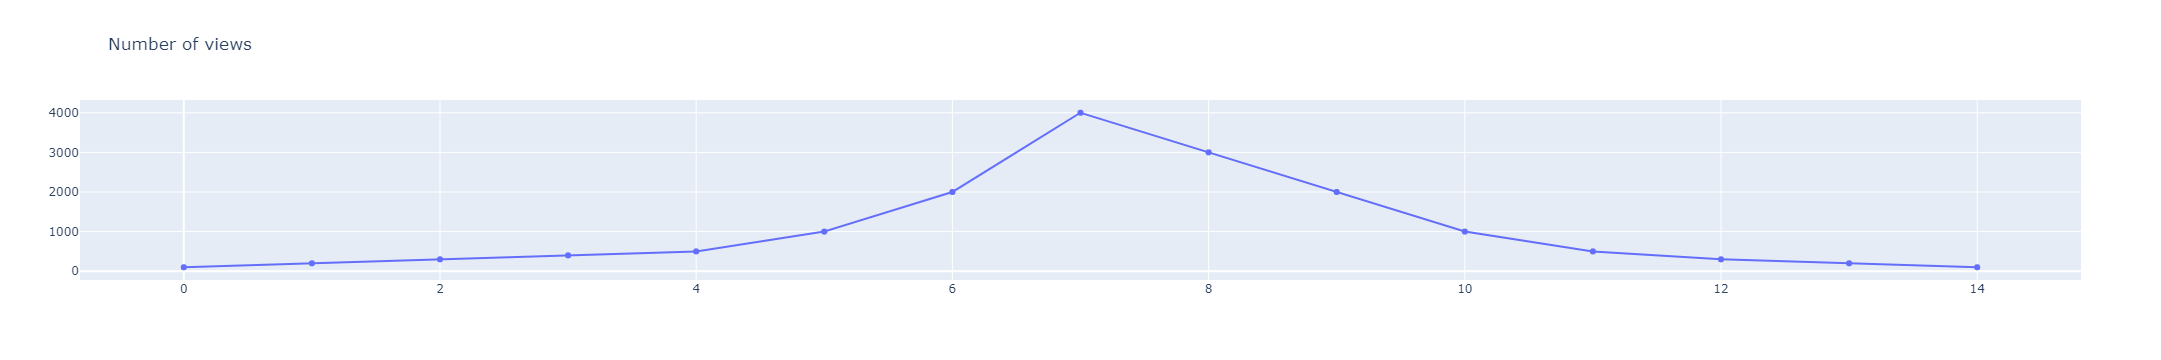

In [99]:
go.Figure(data=go.Scatter(y=T, name="views"), layout=go.Layout(title="Number of views"))

In [100]:
# 0 < l < 100
l_values = [15, 25, 50, 80]

In [101]:
A = {}
for l in l_values:
    A_l = []
    A_prev = 0
    for i in range(len(T)):
        A_cur = T[i] + l/100 * A_prev
        A_l.append(A_cur)
        A_prev = A_cur
    A[l] = np.array(A_l)

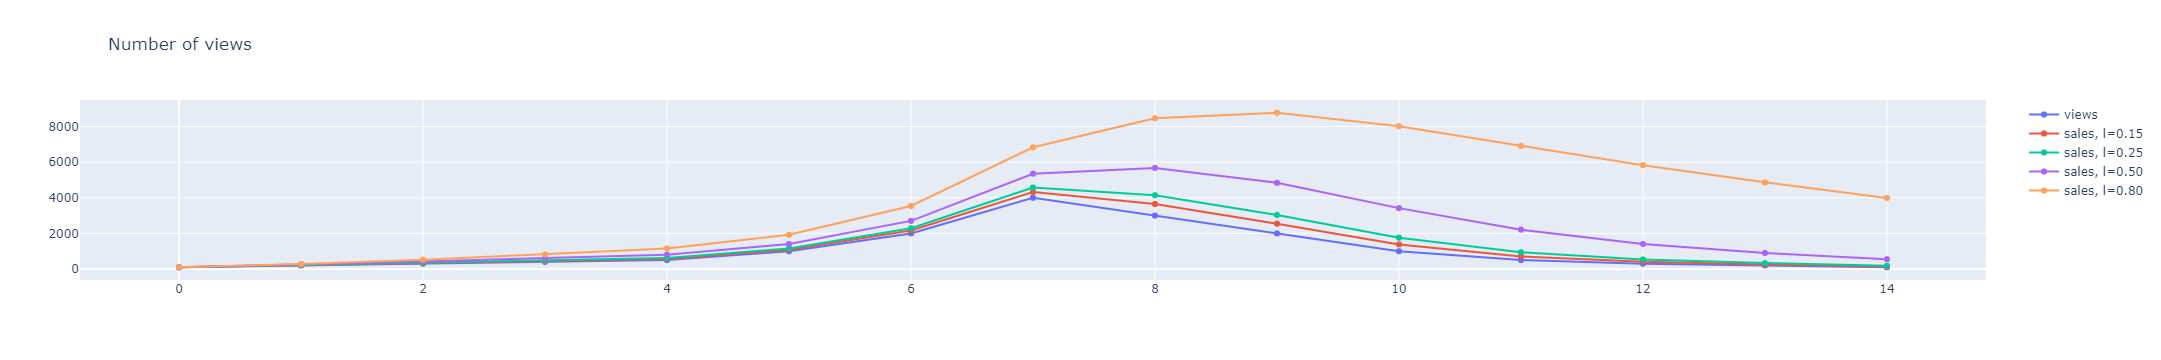

In [102]:
data = []
for l in A.keys():
    data.append(go.Scatter(y=A[l], name=f"sales, l={l/100:.2f}"))
go.Figure(data=[go.Scatter(y=T, name="views")] + data,
          layout=go.Layout(title="Number of views"))

# Log Decay Model

$A_t = \log(T_t) + \lambda A_{t-1}$,  
Values are the same

In [103]:
# 0 < l < 100
l_values = [15, 40, 60, 80]

In [104]:
A = {}
for l in l_values:
    A_l = []
    A_prev = 0
    for i in range(len(T)):
        A_cur = np.log(T[i]) + l/100 * A_prev
        A_l.append(A_cur)
        A_prev = A_cur
    A[l] = np.array(A_l)

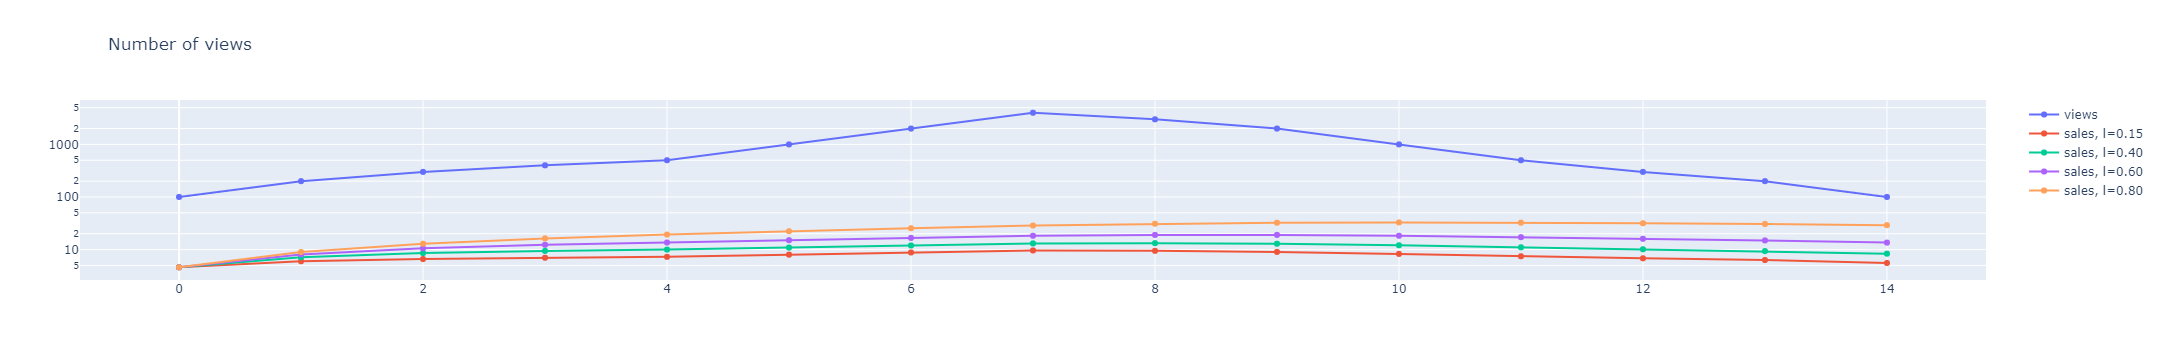

In [105]:
data = []
for l in A.keys():
    data.append(go.Scatter(y=A[l], name=f"sales, l={l/100:.2f}"))
go.Figure(data=[go.Scatter(y=T, name="views")] + data,
          layout=go.Layout(title="Number of views", yaxis={"type": "log"}))

# Negative Exponential Decay Model

$A_t = (1 - e^{-vT_t}) + \lambda A_{t-1}$,  
Values are the same, plus  
$v$ - saturation

In [106]:
# 0 < l < 100
l_values = [15, 40, 60, 80]
# 0 < v < 1000
v_values = [1, 2, 3, 5, 10, 20, 50]

In [107]:
A = {}
for l in l_values:
    for v in v_values:
        A_l = []
        A_prev = 0
        for i in range(len(T)):
            A_cur = 1 - np.exp(-v/1000 * T[i]) + l/100 * A_prev
            A_l.append(A_cur)
            A_prev = A_cur
        A[(l, v)] = np.array(A_l)

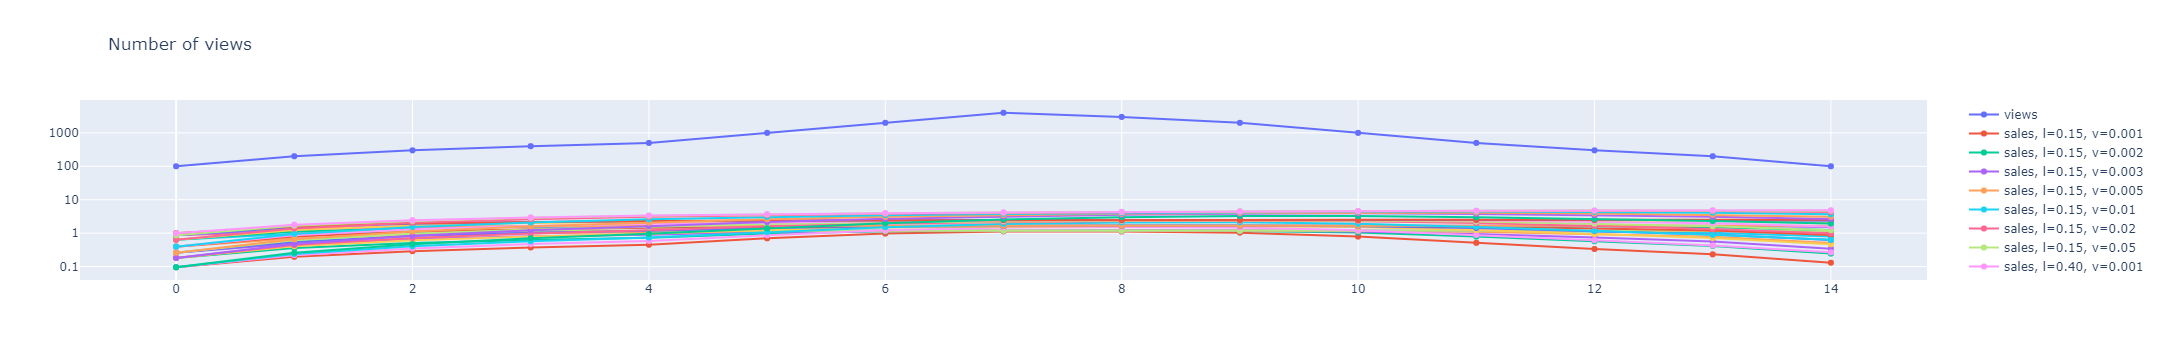

In [108]:
data = []
for l in A.keys():
    data.append(go.Scatter(y=A[l], name=f"sales, l={l[0]/100:.2f}, v={l[1]/1000:.2}"))
go.Figure(data=[go.Scatter(y=T, name="views")] + data,
          layout=go.Layout(title="Number of views", yaxis={"type": "log"}))

# Logistic (S-Curve) Decay Model

$A_t = {1 \over (1 - e^{-vT_t})} + \lambda A_{t-1}$,  
Values are the same, plus  
$v$ - saturation

In [109]:
# 0 < l < 100
l_values = [15, 40, 60, 80]
# 0 < v < 1000
v_values = [1, 2, 3, 5, 10, 20, 50]

In [110]:
A = {}
for l in l_values:
    for v in v_values:
        A_l = []
        A_prev = 0
        for i in range(len(T)):
            A_cur = 1 / (1 - np.exp(-v/1000 * T[i])) + l/100 * A_prev
            A_l.append(A_cur)
            A_prev = A_cur
        A[(l, v)] = np.array(A_l)

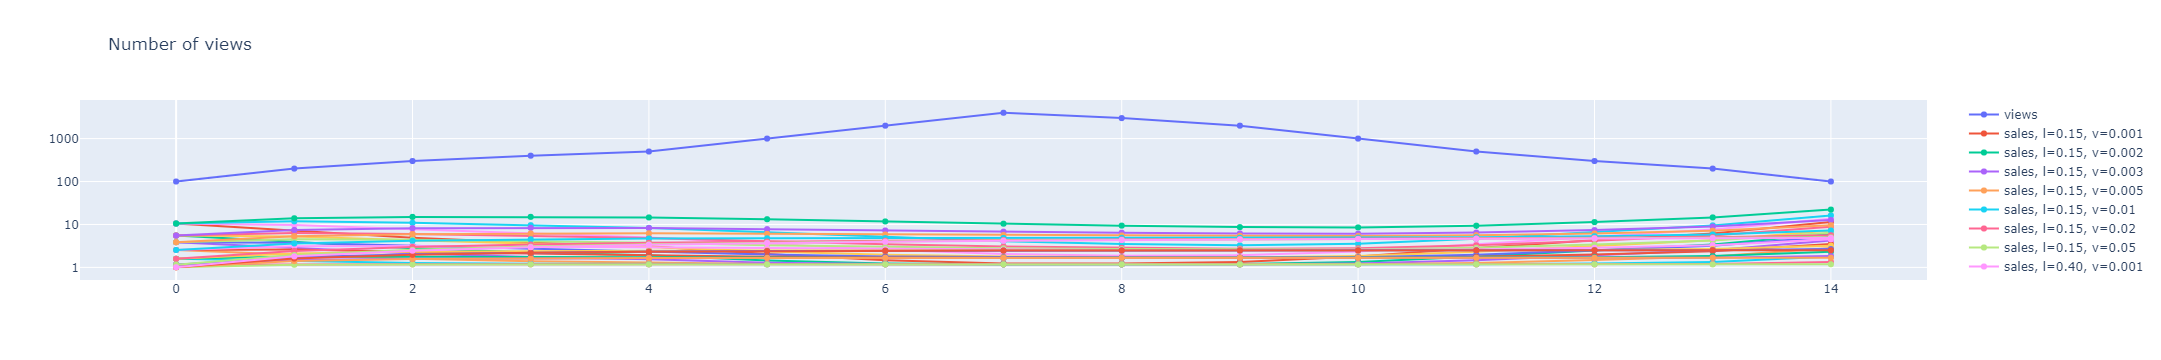

In [111]:
data = []
for l in A.keys():
    data.append(go.Scatter(y=A[l], name=f"sales, l={l[0]/100:.2f}, v={l[1]/1000:.2}"))
go.Figure(data=[go.Scatter(y=T, name="views")] + data,
          layout=go.Layout(title="Number of views", yaxis={"type": "log"}))

# Half-life and lambda

$\lambda^{\mu} = {1 \over 2} $  
$\mu$ - half-life time

In [112]:
def get_half_life_from_lambda(l):
    return np.log(0.5) / np.log(l)

In [113]:
def get_lambda_from_half_life(half_life):
    return (0.5) ** (1 / half_life)

In [114]:
get_half_life_from_lambda(0.25)

0.5

In [115]:
get_lambda_from_half_life(3)

0.7937005259840998